In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


In [ ]:
df = pd.read_excel("Dataset_Quitosana_Adsorcao.xlsx") # lê o arquivo excel 

df = df.drop(['Unnamed: 6', "Artigos", "Experimento"], axis=1) # remove colunas desnecessárias

# df = pd.get_dummies(df, columns=['Modificação'], dtype=int) # Transforma a coluna "Modificação" (categorica) em colunas numéricas 

# Transforma dados categoricos em numéricos
conversion = {
    "Sim": 0,
    "Não": 1
}

df["Modificação_num"] = df["Modificação"].map(conversion) 

In [180]:
df.head()

Modificação  Concentração Inicial (mg/L)  Dose de adsorvente (g/L)   pH  \
0         Não                         20.0                       3.0  6.0   
1         Não                         60.0                       3.0  6.0   
2         Não                         60.0                       5.0  6.0   
3         Não                         60.0                       3.0  6.0   
4         Não                         20.0                       5.0  6.0   

   Remoção (%)  Modificação_num  
0         59.7                1  
1         90.6                1  
2         93.5                1  
3         90.6                1  
4         99.7                1

In [ ]:
# Definições para os treinamentos
random_seed = 42

features = ['Modificação_num', 'Concentração Inicial (mg/L)', 'Dose de adsorvente (g/L)', 'pH']
target = ['Remoção (%)']

indices = df.index

train_indices, test_indices = train_test_split(indices, test_size=0.1, random_state = random_seed)

df_train = df.loc[train_indices]
df_test = df.loc[test_indices]

X_train = df_train.reindex(features, axis=1).values
y_train = df_train.reindex(target, axis=1).values
X_test = df_test.reindex(features, axis=1).values
y_test = df_test.reindex(target, axis=1).values

In [ ]:
# Definição dos modelos

baseline_model = DummyRegressor()

linear_model = LinearRegression()

knn_model = KNeighborsRegressor()

dt_model = DecisionTreeRegressor(random_state=random_seed)

rf_model = RandomForestRegressor(random_state=random_seed)

## Baseline Model 

In [203]:
baseline_model.fit(X_train, y_train)

prediction = baseline_model.predict(X_test)

y_true = y_test
y_pred = baseline_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the baseline model was {RMSE:.4f} %.")

The RMSE of the baseline model was 25.8532 %.


## Linear Regression Model

In [204]:
linear_model.fit(X_train, y_train)

prediction = linear_model.predict(X_test)

y_true = y_test
y_pred = linear_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model was {RMSE:.4f} %.")

The RMSE of the linear model was 22.5533 %.


## K-NN Model

In [224]:
knn_model.fit(X_train, y_train)

prediction = knn_model.predict(X_test)

y_true = y_test
y_pred = knn_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the k-NN model was {RMSE:.4f} %.")

The RMSE of the k-NN model was 19.0962 %.


In [206]:
NUM_NEIGHBORS = [1, 2, 3, 4, 5, 10, 100, 109, 115]

for n in NUM_NEIGHBORS:
    knn_model = KNeighborsRegressor(n_neighbors=n)

    knn_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = knn_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)
    print(f"The RMSE of the k-NN model using k={n} was {RMSE:.4f} %.")

The RMSE of the k-NN model using k=1 was 19.0962 %.
The RMSE of the k-NN model using k=2 was 23.9623 %.
The RMSE of the k-NN model using k=3 was 25.5263 %.
The RMSE of the k-NN model using k=4 was 22.9684 %.
The RMSE of the k-NN model using k=5 was 24.6278 %.
The RMSE of the k-NN model using k=10 was 24.9287 %.
The RMSE of the k-NN model using k=100 was 25.7041 %.
The RMSE of the k-NN model using k=109 was 25.8788 %.
The RMSE of the k-NN model using k=115 was 25.9313 %.


In [ ]:
# Treinar o modelo novamente com parametros otimizados 
# RMSE com 1 vizinhos = 19.0962%

knn_model = KNeighborsRegressor(n_neighbors=1)

## Decision Tree Model

In [225]:
dt_model.fit(X_train, y_train)

prediction = dt_model.predict(X_test)

y_true = y_test
y_pred = dt_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the DT model was {RMSE:.4f} %.")

The RMSE of the DT model was 17.5310 %.


In [209]:
# Testando hiperparâmetros 

NUM_LEAF_NODES = [None, 6, 36, 50, 100]
NUM_DEPTH = [None, 3, 10, 20, 50]

for n_leaves, n_depth in product(NUM_LEAF_NODES, NUM_DEPTH):
    dt_model = DecisionTreeRegressor(
        max_leaf_nodes=n_leaves,
        max_depth=n_depth,
        random_state=random_seed,
    )

    dt_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = dt_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(
        f"The RMSE of the DT model using max_leaf_nodes={n_leaves} "
        f"and max_depth={n_depth} was {RMSE:.4f} %."
    )

The RMSE of the DT model using max_leaf_nodes=None and max_depth=None was 17.5310 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=3 was 19.9118 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=10 was 22.3658 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=20 was 17.5310 %.
The RMSE of the DT model using max_leaf_nodes=None and max_depth=50 was 17.5310 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=None was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=3 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=10 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=20 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=6 and max_depth=50 was 19.5604 %.
The RMSE of the DT model using max_leaf_nodes=36 and max_depth=None was 19.3721 %.
The RMSE of the DT model using max_leaf_nodes=36 and max_depth=3 was 19.9118 %.
The RMSE of the DT m

In [210]:
# Melhor RMSE: 17.5310%

dt_model = DecisionTreeRegressor(
    max_leaf_nodes=None,
    max_depth=None,
    random_state=random_seed,
    )

## Random Florest Model

In [226]:
y_train = y_train.ravel()
y_test = y_test.ravel()

rf_model.fit(X_train, y_train)

prediction = rf_model.predict(X_test)

y_true = y_test
y_pred = rf_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the RF model was {RMSE:.4f} %.")

The RMSE of the RF model was 24.5195 %.


In [223]:
# Testando hiperparametros

NUM_TREES = [1, 10, 100, 300, 350]
NUM_LEAF_NODES = [None, 6]
NUM_DEPTH = [None, 3]

for n_leaves, n_depth, n_trees in product(
    NUM_LEAF_NODES, NUM_DEPTH, NUM_TREES
):
    rf_model = RandomForestRegressor(
        n_estimators=n_trees,
        max_leaf_nodes=n_leaves,
        max_depth=n_depth,
        random_state=random_seed,
        n_jobs=4,
    )

    rf_model.fit(X_train, y_train)

    y_true = y_test
    y_pred = rf_model.predict(X_test)
    RMSE = root_mean_squared_error(y_true, y_pred)

    print(
        f"The RMSE of the RF model using "
        f"n_estimators={n_trees} max_leaf_nodes={n_leaves} "
        f"and max_depth={n_depth} was {RMSE:.4f} %."
    )

The RMSE of the RF model using n_estimators=1 max_leaf_nodes=None and max_depth=None was 23.4498 %.
The RMSE of the RF model using n_estimators=10 max_leaf_nodes=None and max_depth=None was 23.1596 %.
The RMSE of the RF model using n_estimators=100 max_leaf_nodes=None and max_depth=None was 19.5121 %.
The RMSE of the RF model using n_estimators=300 max_leaf_nodes=None and max_depth=None was 19.2959 %.
The RMSE of the RF model using n_estimators=350 max_leaf_nodes=None and max_depth=None was 19.2977 %.
The RMSE of the RF model using n_estimators=1 max_leaf_nodes=None and max_depth=3 was 24.1292 %.
The RMSE of the RF model using n_estimators=10 max_leaf_nodes=None and max_depth=3 was 25.9950 %.
The RMSE of the RF model using n_estimators=100 max_leaf_nodes=None and max_depth=3 was 24.5407 %.
The RMSE of the RF model using n_estimators=300 max_leaf_nodes=None and max_depth=3 was 24.4630 %.
The RMSE of the RF model using n_estimators=350 max_leaf_nodes=None and max_depth=3 was 24.5255 %.
T

In [ ]:
# Melhor RMSE: 18.1257%
# Treinando modelo com hiperparametros otimizados

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=random_seed,
    n_jobs=4,
)

rf_model.fit(X_train, y_train)

y_true = y_test
y_pred = rf_model.predict(X_test)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the RF model was {RMSE:.4f} %.")

The RMSE of the linear model was 19.5121 %.


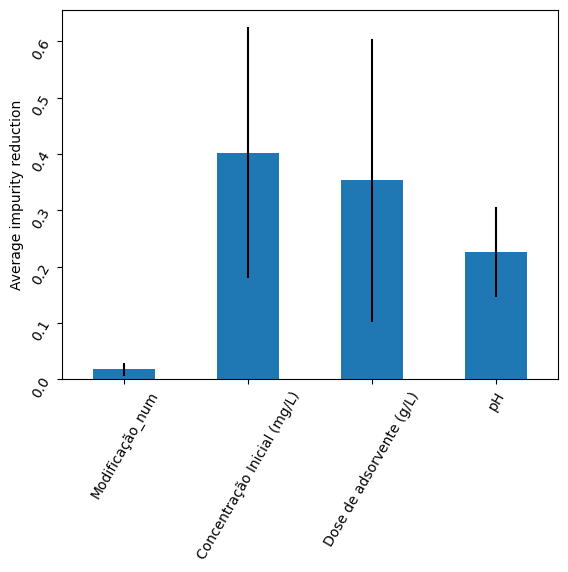

In [214]:
# Verificando importancia das features 

importance = rf_model.feature_importances_
std_dev = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

importance_series = pd.Series(importance, index=features)

fig, axe = plt.subplots()
importance_series.plot.bar(yerr=std_dev, ax=axe)
axe.set_ylabel("Average impurity reduction")
axe.tick_params(rotation = 60)
plt.show()

In [227]:

N_REPEATS = 10

def R2_1param(model, x, y):
    """Computes the coefficient of determination when the alternative hypothesis has no linear coefficient."""
    y_pred = model.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)

X_local = X_train
y_local = y_train

R2 = R2_1param(rf_model, X_local, y_local)
print(f"The R^2 of the prediction is {R2}")

# Here we calculate the feature importances
r = permutation_importance(
    rf_model,
    X_local,
    y_local,
    n_repeats=N_REPEATS,
    random_state=random_seed,
    scoring=R2_1param,
)

print()

# Here we display the results
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

The R^2 of the prediction is 0.9548267410334006

Concentração Inicial (mg/L)0.046 +/- 0.007
pH      0.039 +/- 0.004
Dose de adsorvente (g/L)0.035 +/- 0.005


# Testando com dados normalizados

In [216]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train.reshape(-1, 1))

MinMaxScaler()

In [217]:
################### MODELO LINEAR

linear_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

prediction = linear_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction)

y_true = y_test
y_pred = linear_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the linear model with normalized data was {RMSE:.4f}%.")

The RMSE of the linear model with normalized data was 22.5533%.


In [218]:
################# MODELO K-NN

knn_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = knn_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction)

y_true = y_test
y_pred = knn_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred)

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the k-NN model with normalized data was {RMSE:.4f}%.")


The RMSE of the k-NN model with normalized data was 18.0439%.


In [219]:
################# MODELO ARVORE DE DECISÃO

dt_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = dt_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))

y_true = y_test
y_pred = dt_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the decision tree model with normalized data was {RMSE:.4f}%.")

The RMSE of the decision tree model with normalized data was 17.5310%.


In [220]:
################# MODELO FLORESTA ALEATÓRIA

rf_model.fit(
    scaler_x.transform(X_train),
    scaler_y.transform(y_train.reshape(-1, 1)),
)

# make a prediction using the trained model
prediction = rf_model.predict(scaler_x.transform(X_train))
prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1))

y_true = y_test
y_pred = rf_model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

RMSE = root_mean_squared_error(y_true, y_pred)

print(f"The RMSE of the random florest tree model with normalized data was {RMSE:.4f}%.")


C:\Users\Ana Clara Brandão\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The RMSE of the random florest tree model with normalized data was 19.5682%.
